In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('data.csv')

In [60]:
df.head()

,gender,income,location,taxable_income,year,tax_amount
0,female,5766000,chittagong,5366000,2015,1211500
1,female,6919200,chittagong,6519200,2016,1499800
2,female,8303040,chittagong,7903040,2017,1845760
3,female,9963648,chittagong,9563648,2018,2260912
4,female,11956378,chittagong,11556378,2019,2759094


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14007 entries, 0 to 14006
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          14007 non-null  object
 1   income          14007 non-null  int64 
 2   location        14007 non-null  object
 3   taxable_income  14007 non-null  int64 
 4   year            14007 non-null  int64 
 5   tax_amount      14007 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 656.7+ KB


/tmp/ipykernel_15455/2626274964.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x='income', kde = True, bins= 15, palette='YlGnBu', ax= axes[0])


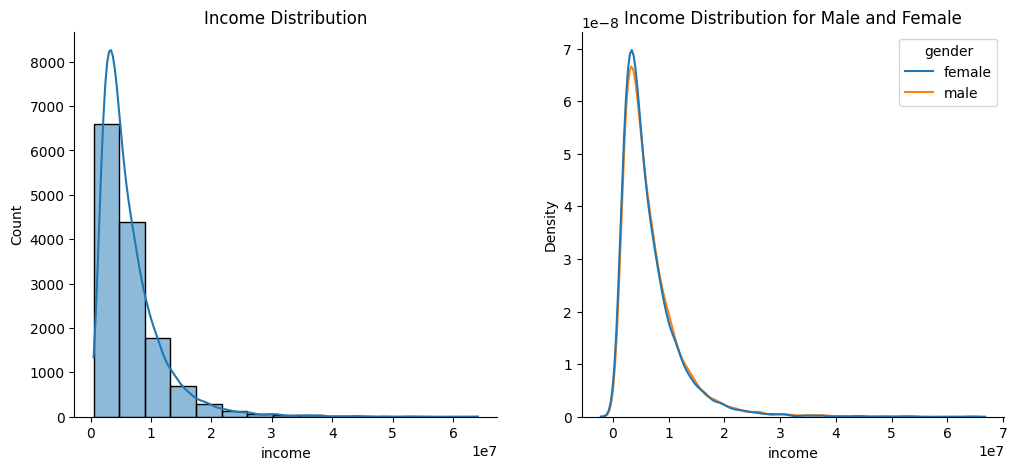

In [62]:
fig, axes = plt.subplots(1,2,figsize=(12,5), sharey= False)
sns.histplot(data = df, x='income', kde = True, bins= 15, palette='YlGnBu', ax= axes[0])
axes[0].set_title('Income Distribution')
sns.kdeplot(data = df, x='income', hue='gender', ax= axes[1])
axes[1].set_title('Income Distribution for Male and Female')
sns.despine(right=True, top=True)

Text(0.5, 1.0, 'Year by year Tax Breakdown')

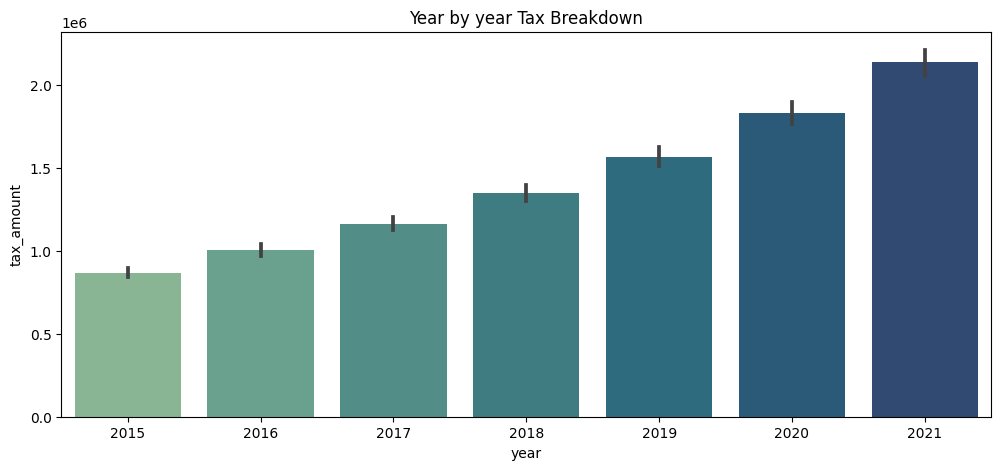

In [68]:
# year on x axis, sum of tax on y axis, bar plot
fig, axes = plt.subplots(1,1,figsize=(12,5), sharey= False)
sns.barplot(data = df, x='year', y='tax_amount', ax= axes, palette='crest')
axes.set_title('Year by year Tax Breakdown')

Text(0.5, 1.0, 'Tax Distribution')

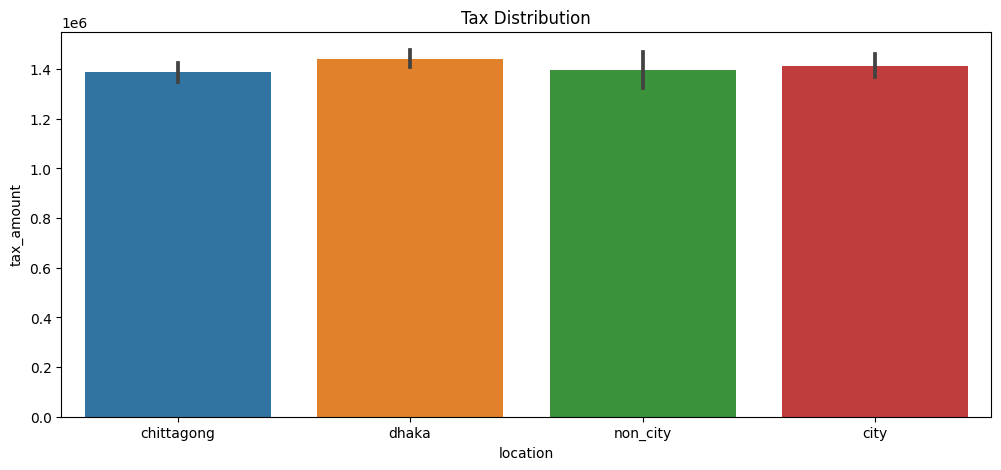

In [64]:
# year on x axis, sum of tax on y axis, bar plot
fig, axes = plt.subplots(1,1,figsize=(12,5), sharey= False)
sns.barplot(data = df, x='location', y='tax_amount', ax= axes)
axes.set_title('Tax Distribution')

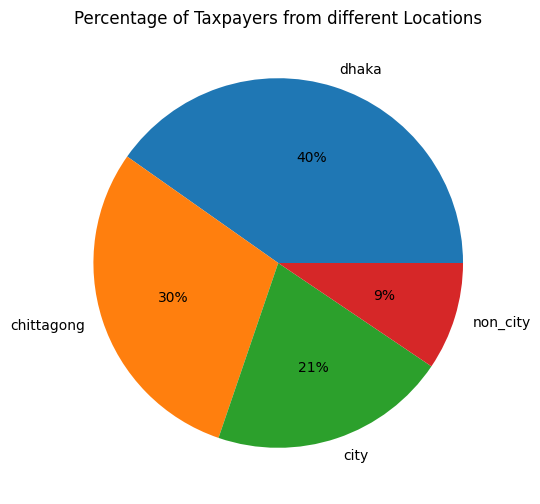

In [65]:
plt.figure(figsize=(6,6))
plt.pie(x=df['location'].value_counts(), labels= df['location'].value_counts().index , 
        autopct='%.0f%%')
plt.title('Percentage of Taxpayers from different Locations')
plt.show()

## Machine Learning

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression

total_tax_by_year = df.groupby('year')['tax_amount'].sum()

model = LinearRegression()

X_train = total_tax_by_year.index.values.reshape(-1,1)
y_train = total_tax_by_year.values
model.fit(X_train, y_train)

X_pred = np.array([2022, 2023, 2024]).reshape(-1,1)
Y_pred = model.predict(X_pred)


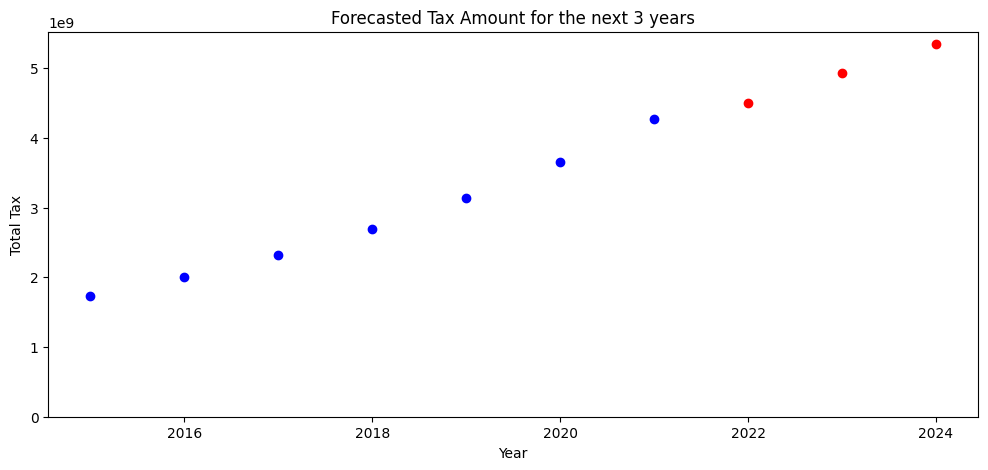

In [67]:
# scatter plot of X_train and y_train
plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_pred, Y_pred, color='red')
plt.title('Forecasted Tax Amount for the next 3 years')
plt.xlabel('Year')
plt.ylabel('Total Tax')
plt.ylim(0)
plt.show()